In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

In [259]:
heart = pd.read_csv('heart.csv')
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [260]:
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [261]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [262]:
enc = OrdinalEncoder()
heart[['SexEn', 'chestpain', 'restingecg', 'exerciseangina', 'st_slope']] = enc.fit_transform(heart[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]) 
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,SexEn,chestpain,restingecg,exerciseangina,st_slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1.0,1.0,1.0,0.0,2.0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0.0,2.0,1.0,0.0,1.0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1.0,1.0,2.0,0.0,2.0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.0,0.0,1.0,1.0,1.0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1.0,2.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,1.0,3.0,1.0,0.0,1.0
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,1.0,0.0,1.0,0.0,1.0
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,1.0,0.0,1.0,1.0,1.0
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,0.0,1.0,0.0,0.0,1.0


In [263]:
new_heart = heart.drop(columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
new_heart

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,SexEn,chestpain,restingecg,exerciseangina,st_slope
0,40,140,289,0,172,0.0,0,1.0,1.0,1.0,0.0,2.0
1,49,160,180,0,156,1.0,1,0.0,2.0,1.0,0.0,1.0
2,37,130,283,0,98,0.0,0,1.0,1.0,2.0,0.0,2.0
3,48,138,214,0,108,1.5,1,0.0,0.0,1.0,1.0,1.0
4,54,150,195,0,122,0.0,0,1.0,2.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1.0,3.0,1.0,0.0,1.0
914,68,144,193,1,141,3.4,1,1.0,0.0,1.0,0.0,1.0
915,57,130,131,0,115,1.2,1,1.0,0.0,1.0,1.0,1.0
916,57,130,236,0,174,0.0,1,0.0,1.0,0.0,0.0,1.0


In [264]:
new_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   RestingBP       918 non-null    int64  
 2   Cholesterol     918 non-null    int64  
 3   FastingBS       918 non-null    int64  
 4   MaxHR           918 non-null    int64  
 5   Oldpeak         918 non-null    float64
 6   HeartDisease    918 non-null    int64  
 7   SexEn           918 non-null    float64
 8   chestpain       918 non-null    float64
 9   restingecg      918 non-null    float64
 10  exerciseangina  918 non-null    float64
 11  st_slope        918 non-null    float64
dtypes: float64(6), int64(6)
memory usage: 86.2 KB


<AxesSubplot:xlabel='HeartDisease', ylabel='Age'>

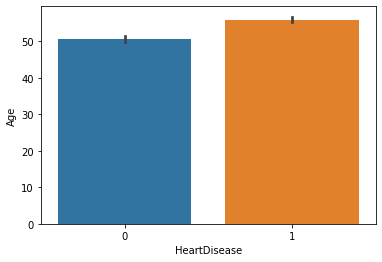

In [265]:
sns.barplot(x="HeartDisease", y="Age", data=new_heart, )

<AxesSubplot:xlabel='HeartDisease', ylabel='RestingBP'>

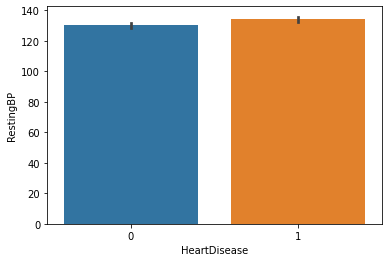

In [266]:
sns.barplot(x="HeartDisease", y="RestingBP", data=new_heart)

<AxesSubplot:xlabel='HeartDisease', ylabel='Cholesterol'>

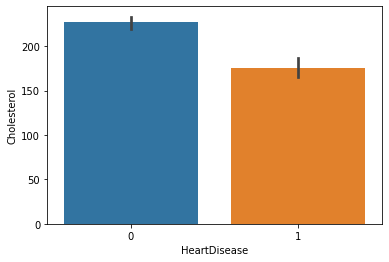

In [267]:
sns.barplot(x="HeartDisease", y="Cholesterol", data=new_heart)

<AxesSubplot:xlabel='HeartDisease', ylabel='FastingBS'>

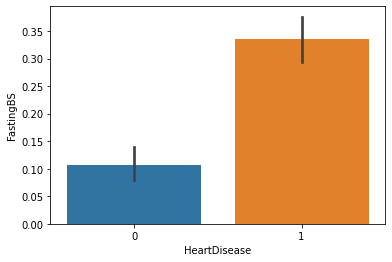

In [268]:
sns.barplot(x="HeartDisease", y="FastingBS", data=new_heart)

<AxesSubplot:xlabel='HeartDisease', ylabel='MaxHR'>

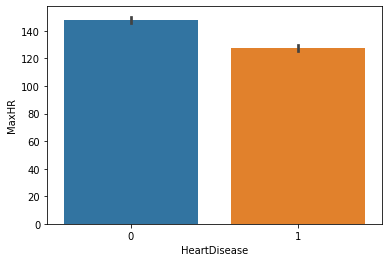

In [269]:
sns.barplot(x="HeartDisease", y="MaxHR", data=new_heart)

<AxesSubplot:xlabel='HeartDisease', ylabel='Oldpeak'>

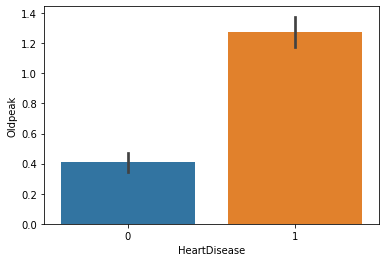

In [270]:
sns.barplot(x="HeartDisease", y="Oldpeak", data=new_heart)

<AxesSubplot:xlabel='HeartDisease', ylabel='SexEn'>

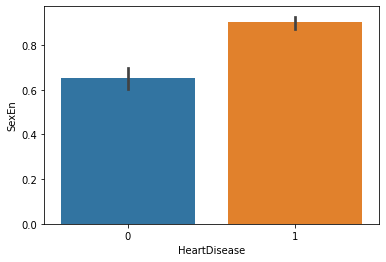

In [271]:
sns.barplot(x="HeartDisease", y="SexEn", data=new_heart)

<AxesSubplot:xlabel='HeartDisease', ylabel='chestpain'>

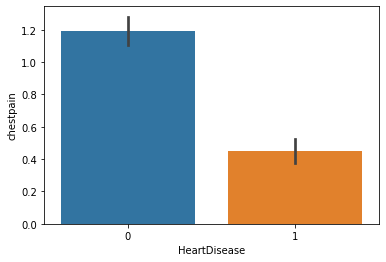

In [272]:
sns.barplot(x="HeartDisease", y="chestpain", data=new_heart)

<AxesSubplot:xlabel='HeartDisease', ylabel='exerciseangina'>

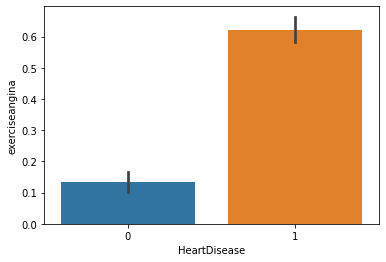

In [273]:
sns.barplot(x="HeartDisease", y="exerciseangina", data=new_heart)

In [274]:
new_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,SexEn,chestpain,restingecg,exerciseangina,st_slope
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377,0.789760,0.781046,0.989107,0.404139,1.361656
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414,0.407701,0.956519,0.631671,0.490992,0.607056
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000


<AxesSubplot:>

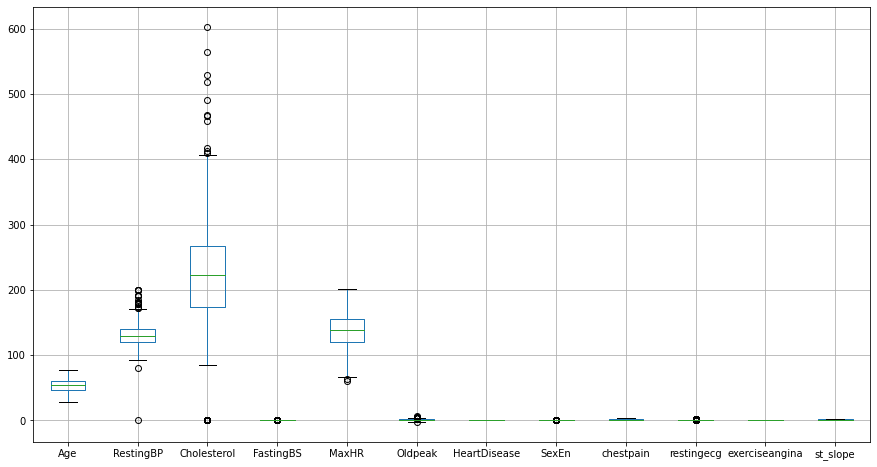

In [275]:
plt.figure(figsize = (15,8))
new_heart.boxplot()

<AxesSubplot:>

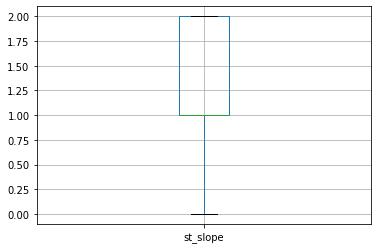

In [276]:
new_heart.boxplot(['st_slope'])

In [277]:
new_heart['RestingBP'] = np.where(new_heart['RestingBP'] > 140.000000, 130.000000, new_heart['RestingBP'])
new_heart['Cholesterol'] = np.where(new_heart['Cholesterol'] > 267.000000, 223.000000, new_heart['Cholesterol'])
new_heart['Oldpeak'] = np.where(new_heart['Oldpeak'] > 1.500000, 0.600000, new_heart['Oldpeak'])

<AxesSubplot:>

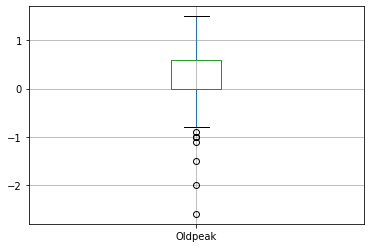

In [278]:
new_heart.boxplot(['Oldpeak'])

In [279]:
y = new_heart['HeartDisease']
x = new_heart.drop(columns=['HeartDisease'], axis=1)

In [295]:
y.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [297]:
sample = SMOTE(random_state=45)
x,y = sample.fit_resample(x,y)

In [312]:
y.value_counts()

0    508
1    508
Name: HeartDisease, dtype: int64

In [298]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=45)

In [299]:
Scaler = MinMaxScaler()
Normal = Scaler.fit_transform(X_train)

X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(Normal, y_train, test_size=.20, random_state=45)

In [300]:
from sklearn.decomposition import PCA

In [301]:
model = PCA(n_components = 10)
model_ = model.fit(X_train_scale, y_train_scale)

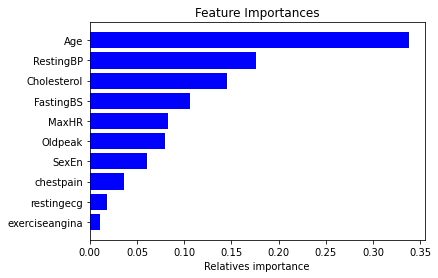

In [302]:
features = x.columns
importances = model_.explained_variance_
indices = np.argsort(importances)[-12:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relatives importance')
plt.show()

In [303]:
model = LogisticRegression()
model = model.fit(X_train_scale, y_train_scale)

In [304]:
coef_deter = model.score(X_train_scale, y_train_scale)
coef_deter

0.8597842835130971

In [305]:
intercept = model.coef_
intercept

array([[ 1.07901042, -0.03972253, -1.03119082,  1.19875581, -0.19391902,
         0.37680101,  1.30734303, -2.22249767, -0.48113303,  1.43040031,
        -2.82710098]])

In [306]:
y_predict = model.predict(X_test_scale)

In [307]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE : ", mean_absolute_error(y_test_scale, y_predict))
print("MSE : ", mean_squared_error(y_test_scale, y_predict))
print("R2 score : ", r2_score(y_test_scale, y_predict))

MAE :  0.15950920245398773
MSE :  0.15950920245398773
R2 score :  0.36001208094231363


In [308]:
y_predict = model.predict(X_test_scale)

In [309]:
cf_matrix = confusion_matrix(y_test_scale, y_predict)
cf_matrix

array([[71, 15],
       [11, 66]], dtype=int64)

In [310]:
cv = RepeatedKFold(n_splits = 10, n_repeats = 4, random_state= 1)
cv

RepeatedKFold(n_repeats=4, n_splits=10, random_state=1)

In [311]:
score = cross_val_score(model, X_test_scale, y_test_scale, scoring = 'accuracy', cv = cv, n_jobs = 1, error_score='raise')
np.mean(score)

0.8236213235294118

In [328]:
classification_report(y_test_scale, y_predict)
print(classification_report(y_test_scale, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        86
           1       0.81      0.86      0.84        77

    accuracy                           0.84       163
   macro avg       0.84      0.84      0.84       163
weighted avg       0.84      0.84      0.84       163

